# Fitness Tracker Data Analysis

#### This is an exploratory data analysis project where I analyze data from fitness trackers (AppleWatch, Fitbit, etc) to find any possible patterns or trends. This dataset can be found on kaggle in the link [Fitness Activity tracker](https://www.kaggle.com/datasets/yaminh/fitness-track-daily-activity-dataset/data) 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
### Read in the data
fitness_data = pd.read_csv('fitness.csv')
fitness_data

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1844505072,4/26/2016,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,0,1347
936,2873212765,4/17/2016,1.70,1.70,0.0,0.00,0.35,1.34,0.0,0,8,160,1272,2524,1529
937,8583815059,4/23/2016,7.35,7.35,0.0,0.53,2.03,4.75,0.0,7,44,238,1151,9423,3012
938,4388161847,5/5/2016,7.38,7.38,0.0,0.63,1.67,5.09,0.0,12,39,199,896,9603,2899


In [60]:
### Change 'Date' to Date Time
fitness_data['DateTime'] = pd.to_datetime(fitness_data['Date'])

In [61]:
### Statistical description of the dataset
fitness_data.describe()

,UserID,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned,DateTime
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940
mean,4.855407e+09,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574,2016-04-26 06:53:37.021276416
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-04-12 00:00:00
25%,2.320127e+09,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000,2016-04-19 00:00:00
50%,4.445115e+09,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000,2016-04-26 00:00:00
75%,6.962181e+09,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000,2016-05-04 00:00:00
max,8.877689e+09,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000,2016-05-12 00:00:00
std,2.424805e+09,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862,NaN


In [57]:
### Find number of null values
fitness_data.isnull().sum()

UserID                        0
Date                          0
Total_Distance                0
Tracker_Distance              0
Logged_Activities_Distance    0
Very_Active_Distance          0
Moderately_Active_Distance    0
Light_Active_Distance         0
Sedentary_Active_Distance     0
Very_Active_Minutes           0
Fairly_Active_Minutes         0
Lightly_Active_Minutes        0
Sedentary_Minutes             0
Steps                         0
Calories_Burned               0
dtype: int64

<Axes: xlabel='Very_Active_Distance', ylabel='Very_Active_Minutes'>

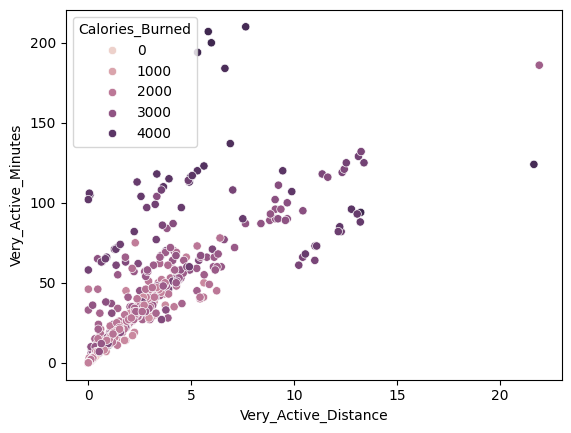

In [58]:
### Scatterplot of total distance and Calories Burned
scatter = sns.scatterplot(fitness_data, x = 'Very_Active_Distance', y = 'Very_Active_Minutes', hue = 'Calories_Burned')
scatter

C:\Users\kamag\AppData\Local\Temp\ipykernel_4072\798020220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  intensity_plot = sns.barplot(intensity_max, palette = 'pastel')


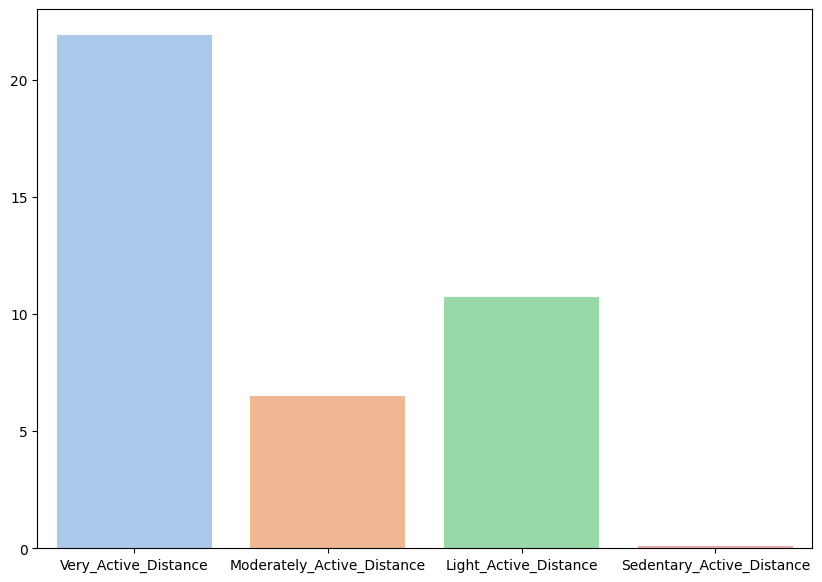

In [59]:
### Graph distance for each type of intensity
intensity_max = fitness_data[['Very_Active_Distance', 'Moderately_Active_Distance', 'Light_Active_Distance', 'Sedentary_Active_Distance']].max()
plt.figure(figsize = (10, 7))
intensity_plot = sns.barplot(intensity_max, palette = 'pastel')

<Axes: xlabel='DateTime', ylabel='Calories_Burned'>

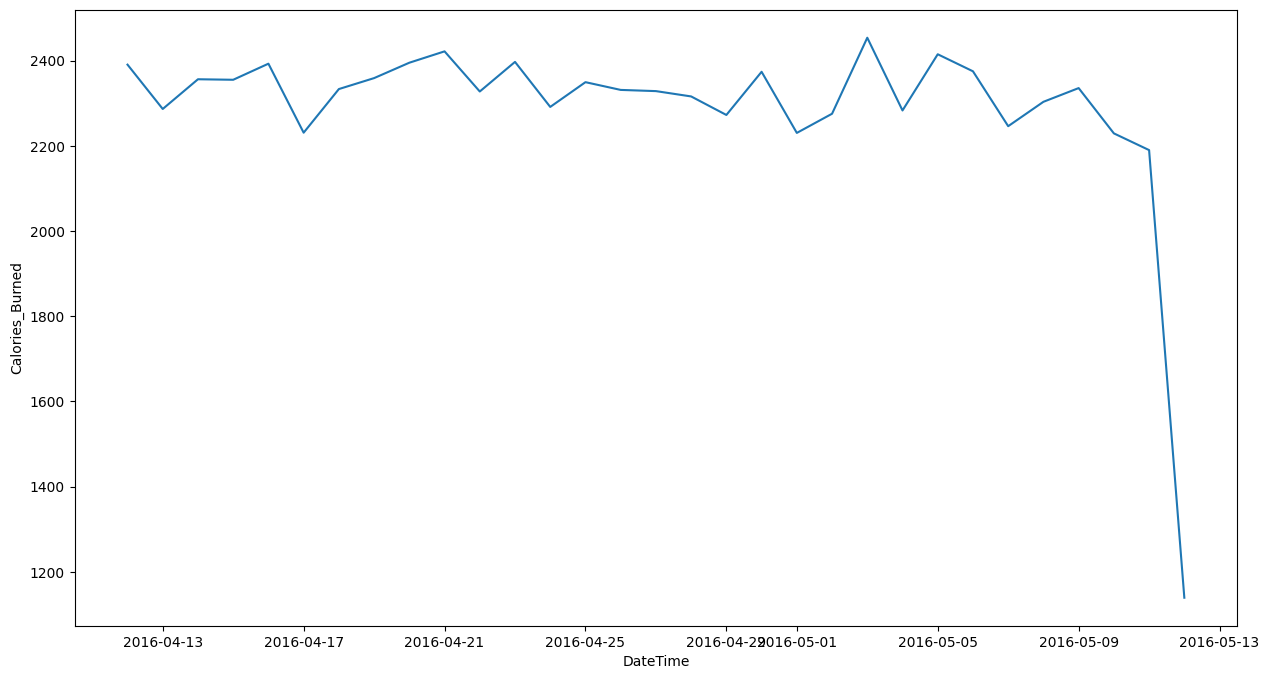

In [65]:
### Next we find mean number of calories burned per day across all users
date_grouped = fitness_data.groupby('Date').mean()
plt.figure(figsize=(15, 8))
mean_calories_graph = sns.lineplot(date_grouped, x = 'DateTime', y = 'Calories_Burned')
mean_calories_graph